In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import time as toom
SLEEP = toom.sleep(1)

### Reception du bruit

In [68]:

f = 100000
fe = 1
time = 60
threshold = 0.001

def seuil(signal, threshold):
    return np.max(np.abs(signal)) > threshold

records = []

def rec(signal):
    for j in range(0, 2):
        for i in range(0,5):
            print(f"{i} enregistrement..")
            signal = sd.rec(int(5 * f), samplerate=f, channels=1)
            sd.wait()
            records.append(signal)
            print("enregistré")



while(1):
    signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
    sd.wait()
    print("attente de signal")
    if seuil(signal, threshold):
        print("signal détecté")
        rec(signal)
        break
    

    



attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
attente de signal
signal détecté
0 enregistrement..
enregistré
1 enregistrement..
enregistré
2 enregistrement..
enregistré
3 enregistrement..
enregistré
4 enregistrement..
enregistré
0 enregistrement..
enregistré
1 enregistrement..
enregistré
2 enregistrement..
enregistré
3 enregistrement..
enregistré
4 enregistrement..
enregistré


In [ ]:

f = 100000
fe = 1
time = 5
threshold = 0.001
records = []
amplis_max = []
freq_array = []

def seuil(signal, threshold):
    return np.max(np.abs(signal)) > threshold


while(1):
    signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
    sd.wait()
    ampli_max = np.max(np.abs(signal))
    print("attente de signal")
    if (ampli_max > threshold):
        print("signal détecté")
        break
while(ampli_max > threshold):
    for j in range(len(records)):
        x=0
        recording = records[j]
        for i in range(len(recording)-1):
            if recording[i] > 0:
                if recording[i+1] < 0:
                    x+=1
            elif recording[i] < 0:
                if recording[i+1] >0:
                    x+=1
        x/=2
        Te=1/f
        fi = x/time
        fi = fi*10
    print(fi)
    
    ampli_max = np.max(np.abs(signal))
    records.append(signal)
    amplis_max.append(ampli_max)
    freq_array.append(fi)
    toom.sleep(4)
    while(1):
        signal = sd.rec(int(1 * fe), samplerate=f, channels=1)
        sd.wait()
        ampli_max = np.max(np.abs(signal))
        print("attente de signal")
        i+=1
        if ampli_max > threshold:
            i = 0
            print("Début")
            break
        elif i < 15:
            break
        


In [ ]:
print(records)
print(len(records))



ValueError: Input could not be cast to an at-least-1D NumPy array

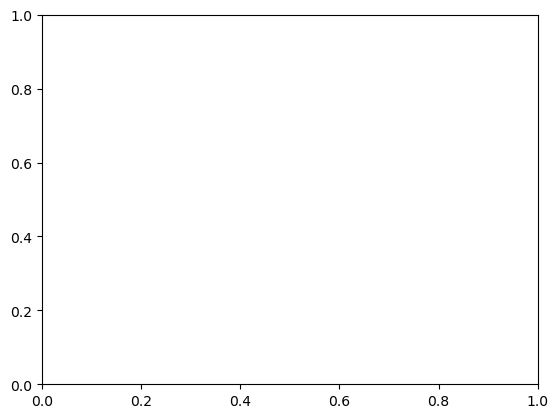

In [84]:
for i in range(len(records)):
    plt.plot(records[i])
    plt.show()

### Visualisation

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)
ax.set_title('Recording')
ax.set_xlabel("Time")
ax.grid(True)
ax.set_ylabel("Amplitude")
#ax.set_xlim(1,1.01060192473242)


In [73]:
for j in range(len(records)):
    x=0
    recording = records[j]
    for i in range(len(recording)-1):
        if recording[i] > 0:
            if recording[i+1] < 0:
                x+=1
        elif recording[i] < 0:
            if recording[i+1] >0:
                x+=1
    x/=2
    Te=1/f
    fi = x/time
    print(fi*10)
    amplitude = (max(recording)+abs(min(recording)))/2
    #amplitude*=2
    print("L'amplitude max est de :",amplitude)









1025.6666666666665
L'amplitude max est de : 0.9999847412109375
1739.8333333333333
L'amplitude max est de : 0.9999847412109375
2535.6666666666665
L'amplitude max est de : 0.9999847412109375
3379.0
L'amplitude max est de : 0.9999847412109375
8076.416666666666
L'amplitude max est de : 0.9999847412109375


In [ ]:

Fselect = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]              #Liste des fréquences selectionnées
Freçus = [998,1991.5,2984.9,3978.2,4972.4,5963.7,6958.5,7952.2,8945.3,9940.1]
Aselect = [0.563,0.609,0.596,0.566,0.591,0.588,0.588,0.464,0.504,0.587]  #Liste des Amplitudes relevées
Gain=20*np.log10(Aselect)                                                            #Conversion en dB

#Affichage de deux axes sur une ligne d'une taille de 12 pouces sur 6 pouces

fig,ax = plt.subplots(1,2, figsize=(15,6)) 

####Axe 1

#Titre

ax[0].set_title("Gain H en fonction de la fréquence (Graphique linéaire)",fontsize=15)   
ax[0].set_xlabel("Fréquence en Hz",fontsize=15)     
ax[0].set_ylabel("Gain en dB",fontsize=15)

#Grille, ligne et annotation fléchées

ax[0].grid()                                
ax[0].hlines(max(Gain)-3,60,20000, color="r")
ax[0].annotate('Fréquence de coupure',fontsize="13", xytext=(10000,-25), xy=(16200,max(Gain)-3), arrowprops=dict(facecolor='k'))

#Affichage

ax[0].plot(Fselect,Gain)                 

####Axe 2

#Titre

ax[1].set_title("Gain H en fonction de la fréquence (semi-log)",fontsize=15)   #Titre de l'axe 2 semi-log
ax[1].set_xlabel("Fréquence en Hz",fontsize=15)     #Titre en abscisse
ax[1].set_ylabel("Gain en dB",fontsize=15)          #Titre en ordonné

#Ligne et annotation fléchées
                                       
ax[1].hlines(max(Gain)-3,60,20000, color="r")     
ax[1].annotate('Fréquence de coupure', fontsize="13", xytext=(100,-25), xy=(120,max(Gain)-3), arrowprops=dict(facecolor='k'))

#Affichage en semilog

ax[1].semilogx(Fselect,Gain)       
ax[1].grid(True,which="both", linestyle='--')